In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from datetime import datetime
import folium
from folium.plugins import HeatMap

In [3]:
with open("AccidentsBig.csv", "r", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())

Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date

1,78.61039332,14.72402585,1,2,1,1,3,17:42,12,E09000020,3,3218,6,30,0,-1,-1,0,0,1,1,2,2,0,0,1,1,E01002849,04-01-2018

2,78.53404158,14.76235346,1,3,1,1,4,17:36,12,E09000020,4,450,3,30,6,2,5,0,0,5,4,1,1,0,0,1,1,E01002909,05-01-2018

3,78.47087739,14.74560635,1,3,2,1,5,00:15,12,E09000020,5,0,6,30,0,-1,-1,0,0,0,4,1,1,0,0,1,1,E01002857,06-01-2018

4,78.55799399,14.66712796,1,3,1,1,6,10:35,12,E09000020,3,3220,6,30,0,-1,-1,0,0,0,1,1,1

In [31]:
df = pd.read_csv("AccidentsBig.csv", delimiter=",", low_memory=False)
df.head(5)

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1.0,78.610393,14.724026,1.0,2.0,1.0,1.0,3.0,17:42,12.0,...,1.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,E01002849,04-01-2018
1,2.0,78.534042,14.762353,1.0,3.0,1.0,1.0,4.0,17:36,12.0,...,5.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002909,05-01-2018
2,3.0,78.470877,14.745606,1.0,3.0,2.0,1.0,5.0,00:15,12.0,...,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002857,06-01-2018
3,4.0,78.557994,14.667128,1.0,3.0,1.0,1.0,6.0,10:35,12.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01002840,07-01-2018
4,5.0,78.576431,14.703443,1.0,3.0,1.0,1.0,2.0,21:13,12.0,...,0.0,7.0,1.0,2.0,0.0,0.0,1.0,1.0,E01002863,10-01-2018


In [5]:
print("✅ Dataset Loaded Successfully!")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())


✅ Dataset Loaded Successfully!
Shape: (1048575, 30)

Columns: ['Accident_Index', 'longitude', 'latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location', 'Date']


In [33]:
# Accident Severity
accident_severity_map = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

# Day of Week
day_of_week_map = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}

# Road Type
road_type_map = {
    1:'Roundabout', 2:'One way street', 3:'Dual carriageway', 6:'Single carriageway',
    7:'Slip road', 9:'Unknown', 12:'Other'
}

# 1st Road Class
road_class_map = {1:'Motorway', 2:'A(M)', 3:'A', 4:'B', 5:'C', 6:'Unclassified'}

# Junction Detail
junction_detail_map = {
    0:'Not at junction', 1:'Roundabout', 2:'Mini-roundabout', 3:'T or staggered junction',
    4:'Slip road', 5:'Crossroads', 6:'Private drive', 7:'Other'
}

# Junction Control
junction_control_map = {
    0:'Not at junction', 1:'Give way', 2:'Stop', 3:'Traffic signal', 4:'Police', 5:'Other'
}

# Light Conditions
light_conditions_map = {
    1:'Daylight', 4:'Darkness - lights lit', 5:'Darkness - lights unlit', 6:'Darkness - no lighting', 7:'Unknown'
}

# Weather Conditions
weather_conditions_map = {
    1:'Fine no high winds', 2:'Raining no high winds', 3:'Snowing no high winds',
    4:'Fine + high winds', 5:'Raining + high winds', 6:'Snowing + high winds',
    7:'Fog or mist', 8:'Other', 9:'Unknown'
}

# Road Surface Conditions
road_surface_map = {
    1:'Dry', 2:'Wet/Damp', 3:'Snow', 4:'Flood', 5:'Frost/Ice', 6:'Other', 7:'Unknown'
}

# Special Conditions at Site
special_conditions_map = {
    0:'None', 1:'Roadworks', 2:'Oil or diesel', 3:'Mud', 4:'Other'
}

# Carriageway Hazards
carriageway_hazards_map = {
    0:'None', 1:'Vehicle obstruction', 2:'Other obstruction', 3:'Pedestrian on carriageway'
}

# Urban or Rural Area
urban_rural_map = {1:'Urban', 2:'Rural'}

# Did Police Officer Attend Scene of Accident
police_attend_map = {1:'Yes', 2:'No', 3:'Unknown'}


In [34]:
def map_all_numeric_columns(df):
    """
    Map numeric-coded columns to human-readable string labels
    """
    column_mappings = {
        'Accident_Severity': accident_severity_map,
        'Day_of_Week': day_of_week_map,
        'Road_Type': road_type_map,
        '1st_Road_Class': road_class_map,
        '2nd_Road_Class': road_class_map,
        'Junction_Detail': junction_detail_map,
        'Junction_Control': junction_control_map,
        'Light_Conditions': light_conditions_map,
        'Weather_Conditions': weather_conditions_map,
        'Road_Surface_Conditions': road_surface_map,
        'Special_Conditions_at_Site': special_conditions_map,
        'Carriageway_Hazards': carriageway_hazards_map,
        'Urban_or_Rural_Area': urban_rural_map,
        'Did_Police_Officer_Attend_Scene_of_Accident': police_attend_map
    }

    for col, mapping in column_mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping).fillna('Unknown')

    return df


In [35]:
df = map_all_numeric_columns(df)


In [36]:
columns_to_check = [
    'Accident_Severity', 'Day_of_Week', 'Road_Type', '1st_Road_Class',
    'Junction_Detail', 'Junction_Control', 'Light_Conditions',
    'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site',
    'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'
]

df[columns_to_check].head(10)



,Accident_Severity,Day_of_Week,Road_Type,1st_Road_Class,Junction_Detail,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,Serious,Wednesday,Single carriageway,A,Not at junction,Unknown,Daylight,Raining no high winds,Wet/Damp,None,None,Urban,Yes
1,Slight,Thursday,Dual carriageway,B,Private drive,Stop,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes
2,Slight,Friday,Single carriageway,C,Not at junction,Unknown,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes
3,Slight,Saturday,Single carriageway,A,Not at junction,Unknown,Daylight,Fine no high winds,Dry,None,None,Urban,Yes
4,Slight,Tuesday,Single carriageway,Unclassified,Not at junction,Unknown,Unknown,Fine no high winds,Wet/Damp,None,None,Urban,Yes
5,Slight,Wednesday,Single carriageway,Unclassified,Not at junction,Unknown,Daylight,Raining no high winds,Wet/Damp,Unknown,None,Urban,Yes
6,Slight,Friday,Single carriageway,C,T or staggered junction,Police,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes
7,Slight,Saturday,Dual carriageway,A,Not at junction,Unknown,Daylight,Fine no high winds,Dry,None,None,Urban,Yes
8,Slight,Sunday,Single carriageway,A,Private drive,Stop,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes
9,Slight,Sunday,Single carriageway,B,T or staggered junction,Police,Daylight,Fine no high winds,Dry,None,None,Urban,Yes


In [38]:
# ========================================
# STEP 1: Check Missing Values
# ========================================
print("🔍 Checking missing values...\n")
missing_summary = df.isnull().sum().sort_values(ascending=False)
print(missing_summary[missing_summary > 0])
print("\nTotal Missing Columns:", missing_summary[missing_summary > 0].count())


🔍 Checking missing values...

LSOA_of_Accident_Location                  988674
Time                                       988578
Accident_Index                             988577
Local_Authority_(Highway)                  988577
Pedestrian_Crossing-Physical_Facilities    988577
Pedestrian_Crossing-Human_Control          988577
2nd_Road_Number                            988577
longitude                                  988577
Speed_limit                                988577
1st_Road_Number                            988577
Date                                       988577
Police_Force                               988577
latitude                                   988577
Number_of_Casualties                       988577
Number_of_Vehicles                         988577
Local_Authority_(District)                 988577
dtype: int64

Total Missing Columns: 16


In [39]:
# ========================================
# STEP 2: Remove Duplicate Records (if any)
# ========================================
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"✅ Removed {before - after} duplicate rows.")


✅ Removed 988576 duplicate rows.


In [41]:
# ========================================
# STEP 4: Verify Cleanup
# ========================================
print("\n✅ After Cleaning:")
print(df.isnull().sum().sum(), "missing values remaining.")
print("Dataset shape:", df.shape)



✅ After Cleaning:
0 missing values remaining.
Dataset shape: (59998, 30)


In [42]:
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())


Data Types:
 Accident_Index                                 float64
longitude                                      float64
latitude                                       float64
Police_Force                                   float64
Accident_Severity                               object
Number_of_Vehicles                             float64
Number_of_Casualties                           float64
Day_of_Week                                     object
Time                                            object
Local_Authority_(District)                     float64
Local_Authority_(Highway)                       object
1st_Road_Class                                  object
1st_Road_Number                                float64
Road_Type                                       object
Speed_limit                                    float64
Junction_Detail                                 object
Junction_Control                                object
2nd_Road_Class                                  obj

In [61]:
 m= folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)
heat_data = df[['latitude','longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=8, blur=12, max_zoom=13).add_to(m)
m.save("accident_heatmap.html")

In [22]:
# ------------------------------------------------------------
# 2️⃣ Parse Date and Time Columns (Safe Conversion)
# ------------------------------------------------------------
# Combine Date and Time into one datetime column
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"], errors="coerce", format="%d-%m-%Y %H:%M")

# Show basic info
print("✅ Dataset loaded successfully!\n")
print(df.info())
print("\nSample data:")
print(df.head())
# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert Time to string, fill missing as "00:00" if blank
df['Time'] = df['Time'].astype(str).replace('nan', '00:00')

# Combine Date and Time into one column safely
df['DateTime'] = pd.to_datetime(
    df['Date'].astype(str) + ' ' + df['Time'], errors='coerce'
)

# Extract features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

print("\n✅ Successfully combined Date and Time into 'DateTime'")
print(df[['Date', 'Time', 'DateTime']].head())

C:\Users\Raghav Bhardwaj\AppData\Local\Temp\ipykernel_11184\3737447774.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(



✅ Successfully combined Date and Time into 'DateTime'
                 Date   Time            DateTime
0 2025-10-12 17:42:00  17:42 2025-10-12 17:42:00
1 2025-10-12 17:36:00  17:36 2025-10-12 17:36:00
2 2025-10-12 00:15:00  00:15 2025-10-12 00:15:00
3 2025-10-12 10:35:00  10:35 2025-10-12 10:35:00
4 2025-10-12 21:13:00  21:13 2025-10-12 21:13:00


In [21]:
# Extract date parts
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour

print("\n✅ Date and Time combined successfully into 'DateTime'")


✅ Date and Time combined successfully into 'DateTime'


In [44]:
# ------------------------------------------------------------
# 4️⃣ Quick Statistics
# ------------------------------------------------------------
print("\nSummary of Numeric Columns:")
print(df.describe().T)


Summary of Numeric Columns:
                                           count          mean           std  \
Accident_Index                           59998.0  29999.500000  17320.075062   
longitude                                59998.0     78.098483      5.949539   
latitude                                 59998.0     22.083749      5.655470   
Police_Force                             59998.0      4.304360      4.569113   
Number_of_Vehicles                       59998.0      1.832028      0.692804   
Number_of_Casualties                     59998.0      1.320761      0.762099   
Local_Authority_(District)               59998.0     71.151072     63.827188   
1st_Road_Number                          59998.0    901.988450   1755.837897   
Speed_limit                              59998.0     35.055002     11.456121   
2nd_Road_Number                          59998.0    330.956232   1185.561831   
Pedestrian_Crossing-Human_Control        59998.0      0.006184      0.102529   
Pedestrian_

In [50]:
# Set style
sns.set(style='whitegrid', palette='coolwarm', font_scale=1.1)
plt.rcParams['figure.figsize'] = (10,6)

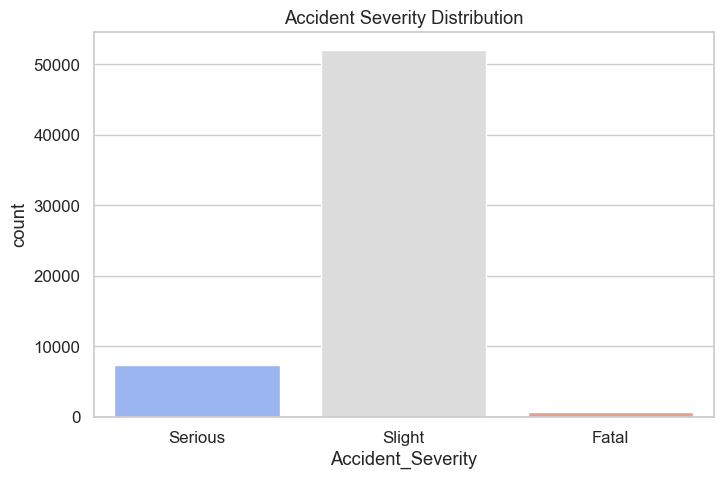

In [57]:
# Accident Severity Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Accident_Severity', data=df, hue='Accident_Severity', palette='coolwarm', legend=False)
plt.title("Accident Severity Distribution")
plt.show()


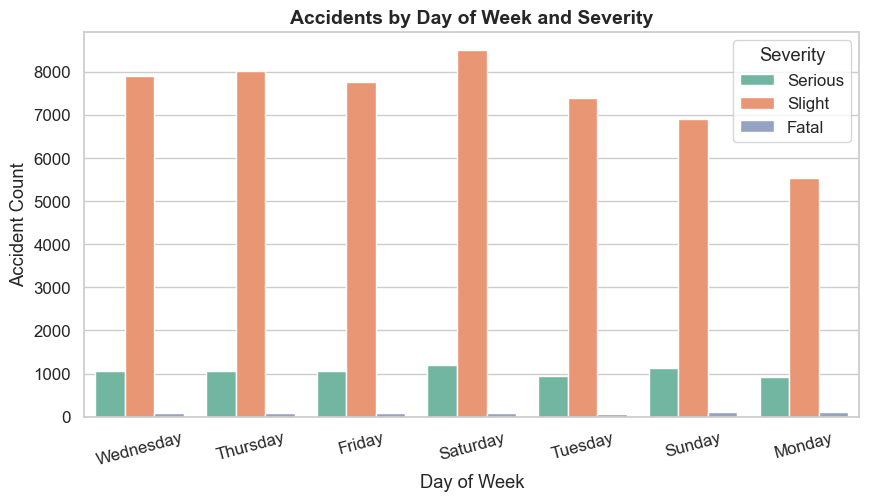

In [56]:
# Accidents by Day of Week
plt.figure(figsize=(10,5))
sns.countplot(x='Day_of_Week', data=df, hue='Accident_Severity', palette='Set2')
plt.title('Accidents by Day of Week and Severity', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Accident Count')
plt.xticks(rotation=15)
plt.legend(title='Severity')
plt.show()

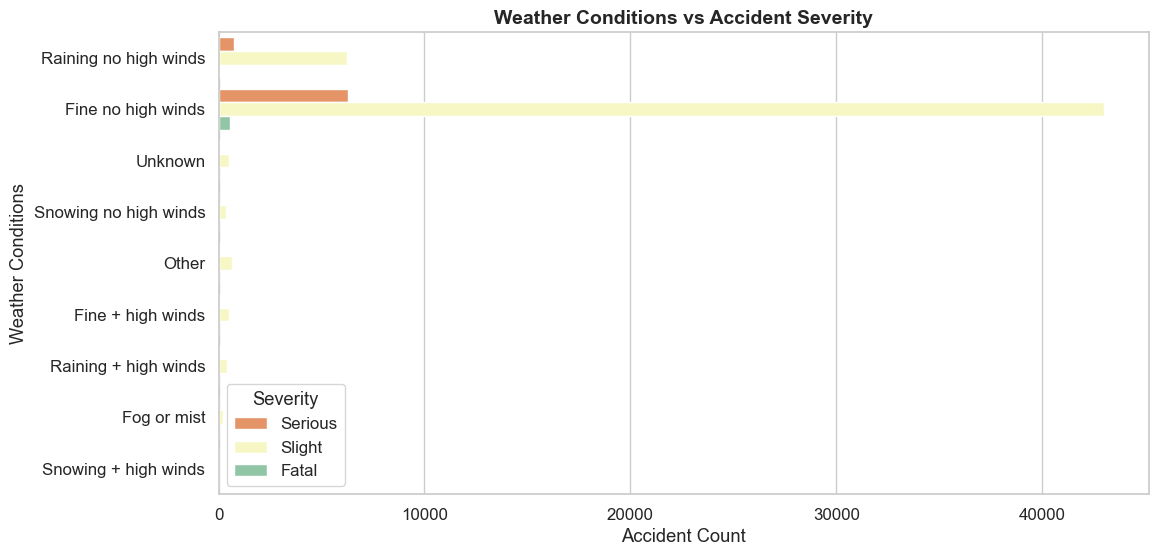

In [59]:
# Weather Impact on Accident Severity
plt.figure(figsize=(12,6))
sns.countplot(y='Weather_Conditions', data=df, hue='Accident_Severity', palette='Spectral')
plt.title('Weather Conditions vs Accident Severity', fontsize=14, fontweight='bold')
plt.xlabel('Accident Count')
plt.ylabel('Weather Conditions')
plt.legend(title='Severity')
plt.show()


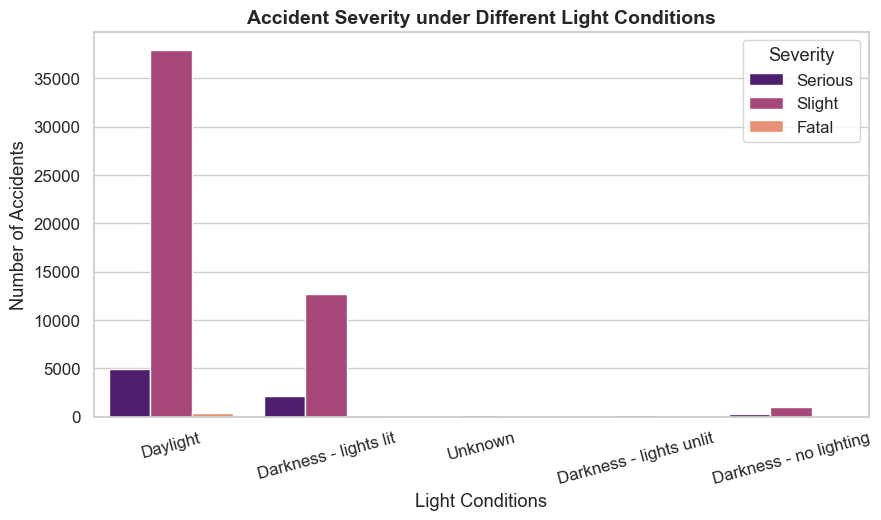

In [60]:
# Light Conditions and Accident Frequency
plt.figure(figsize=(10,5))
sns.countplot(x='Light_Conditions', data=df, hue='Accident_Severity', palette='magma')
plt.title('Accident Severity under Different Light Conditions', fontsize=14, fontweight='bold')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=15)
plt.legend(title='Severity')
plt.show()

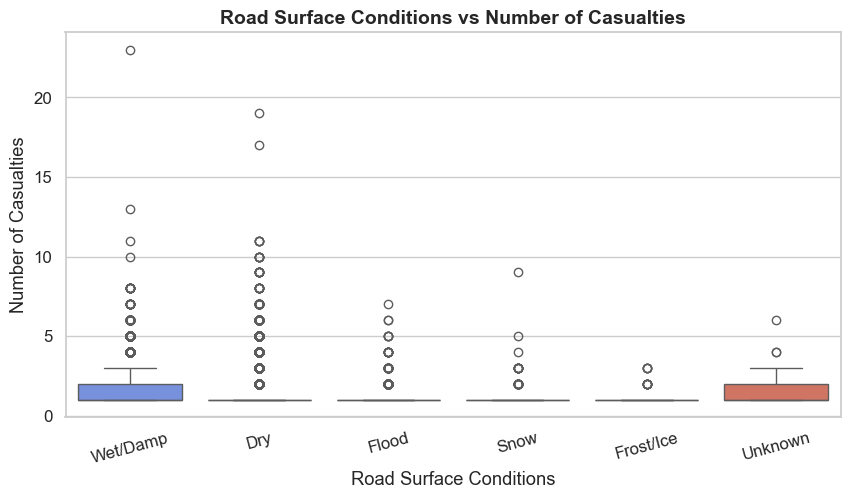

In [63]:
# Road Surface Conditions vs Number of Casualties
plt.figure(figsize=(10,5))
sns.boxplot(
    x='Road_Surface_Conditions',
    y='Number_of_Casualties',
    hue='Road_Surface_Conditions',     # 👈 required for Seaborn 0.14+
    data=df,
    palette='coolwarm',
    legend=False
)
plt.title('Road Surface Conditions vs Number of Casualties', fontsize=14, fontweight='bold')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=15)
plt.show()

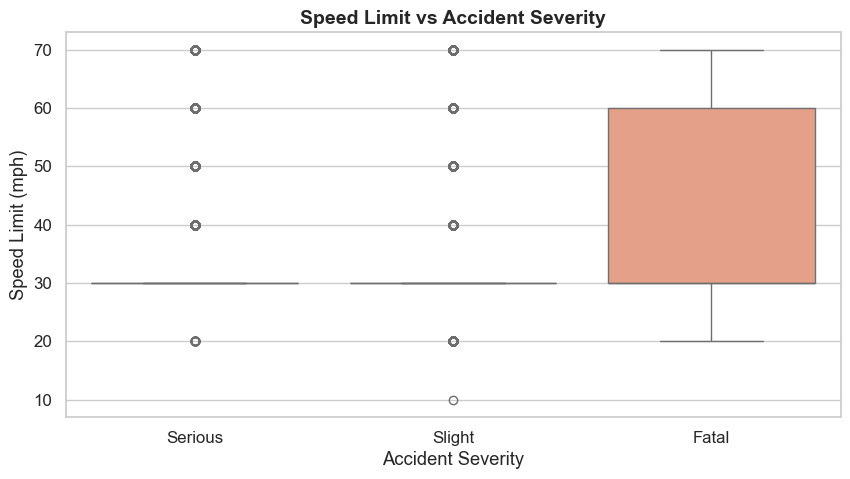

In [65]:
# Speed Limit vs Accident Severity
plt.figure(figsize=(10,5))
sns.boxplot(
    x='Accident_Severity',
    y='Speed_limit',
    hue='Accident_Severity',  # ✅ Required for Seaborn ≥ 0.14
    data=df,
    palette='coolwarm',
    legend=False
)
plt.title('Speed Limit vs Accident Severity', fontsize=14, fontweight='bold')
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit (mph)')
plt.show()

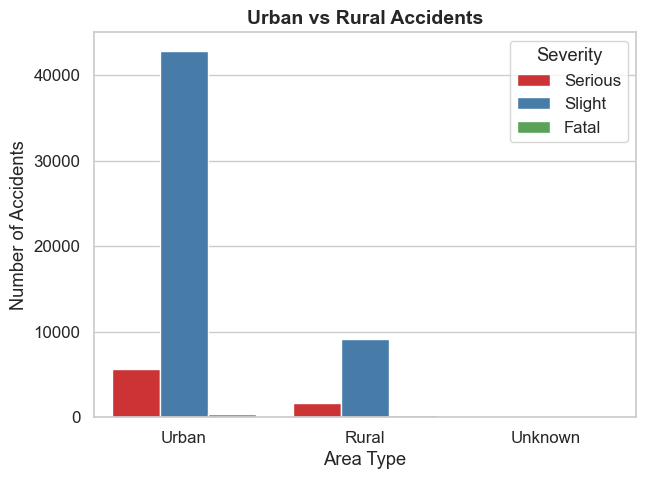

In [67]:
#Urban vs Rural Accident Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='Urban_or_Rural_Area', data=df, hue='Accident_Severity', palette='Set1')
plt.title('Urban vs Rural Accidents', fontsize=14, fontweight='bold')
plt.xlabel('Area Type')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.show()

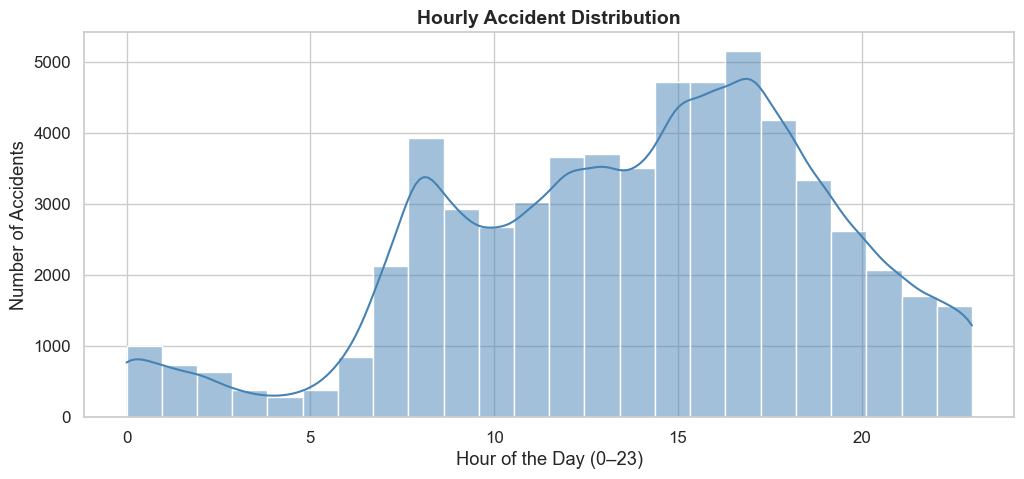

In [71]:
 #Hourly Accident Pattern (Time-Based)
# Extract hour safely
# Handle invalid or missing time values safely
def extract_hour_safe(time_str):
    try:
        # Convert valid time strings like '13:45' -> 13
        return int(str(time_str)[:2]) if str(time_str)[:2].isdigit() else np.nan
    except:
        return np.nan

# Apply the function
df['Hour'] = df['Time'].apply(extract_hour_safe)

# Replace missing values (if any) with 0 or drop them
df['Hour'] = df['Hour'].fillna(0).astype(int)

# ✅ Now plot safely
plt.figure(figsize=(12,5))
sns.histplot(df['Hour'], bins=24, kde=True, color='steelblue')
plt.title('Hourly Accident Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day (0–23)')
plt.ylabel('Number of Accidents')
plt.show()

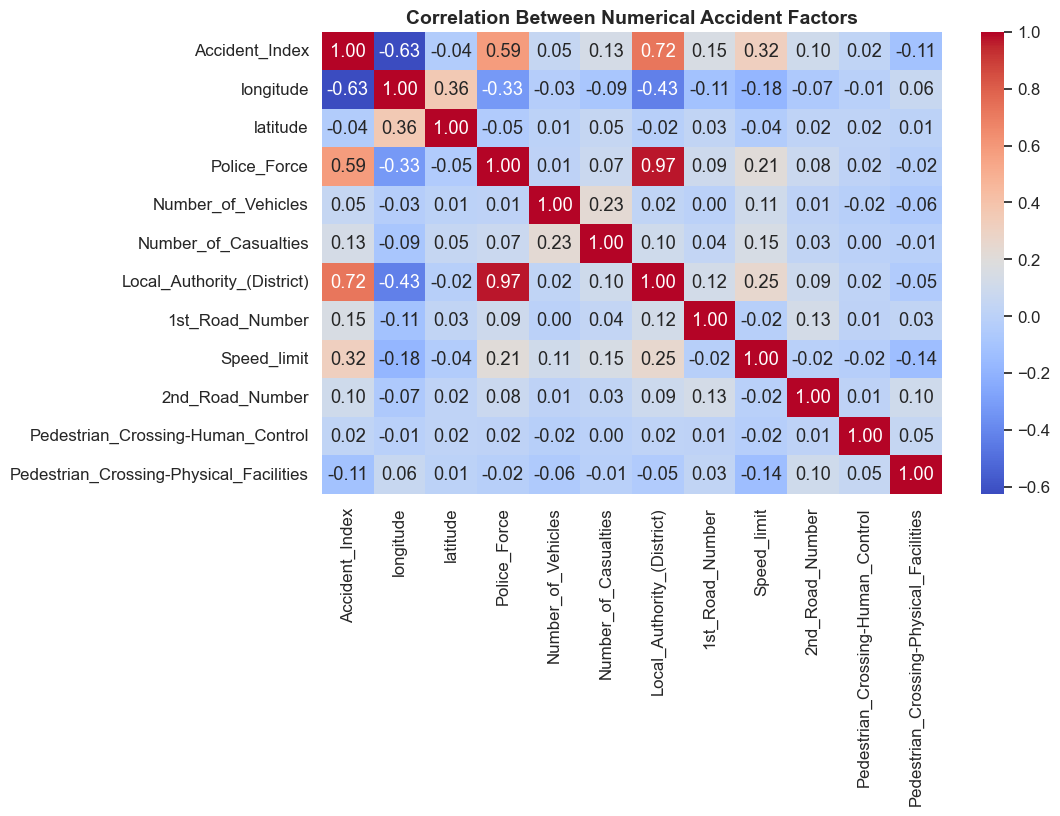

In [70]:
# Heatmap of Accident Correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Accident Factors', fontsize=14, fontweight='bold')
plt.show()

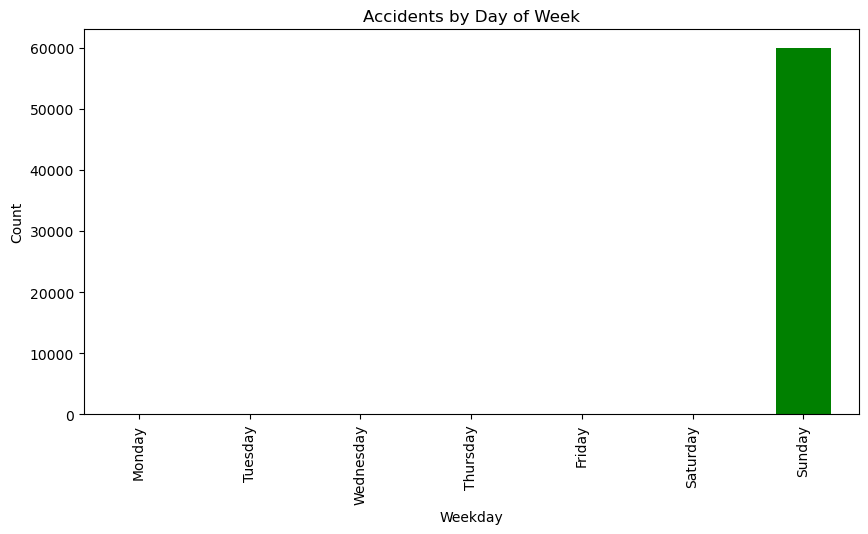

In [31]:
plt.figure(figsize=(10,5))
df.groupby('Weekday').size().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', color='green')
plt.title("Accidents by Day of Week")
plt.ylabel("Count")
plt.show()

In [72]:
# ------------------------------------------------------------
# 8️⃣ Hotspot Detection using DBSCAN
# ------------------------------------------------------------
coords = df[['latitude', 'longitude']].dropna()
db = DBSCAN(eps=0.01, min_samples=30).fit(coords)
df['Cluster'] = db.labels_

clusters = df[df['Cluster'] != -1].groupby('Cluster')[['latitude','longitude']].mean()
clusters['Count'] = df[df['Cluster'] != -1]['Cluster'].value_counts()
clusters.reset_index(inplace=True)
clusters.to_csv("Accident_Hotspots_DBSCAN.csv", index=False)

print(f"\n✅ Hotspot Clusters Found: {clusters.shape[0]}")
print("Hotspot data saved as 'Accident_Hotspots_DBSCAN.csv'")



✅ Hotspot Clusters Found: 32
Hotspot data saved as 'Accident_Hotspots_DBSCAN.csv'


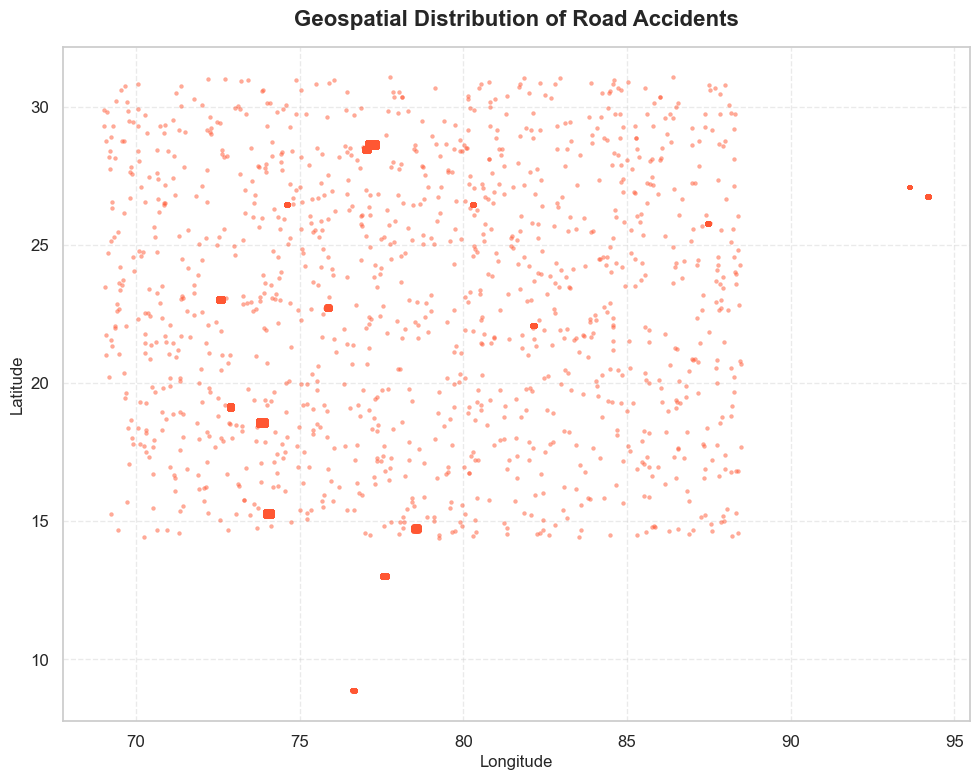

In [73]:
## ------------------------------------------------------------
# 🌍 9️⃣ Geo Visualization – Professional Static Map
# ------------------------------------------------------------
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='longitude', 
    y='latitude', 
    data=df,
    s=8,                    # small marker size
    alpha=0.5,              # transparency for density effect
    color='#FF5733',        # warm professional tone
    edgecolor=None
)

plt.title(
    "Geospatial Distribution of Road Accidents",
    fontsize=16, fontweight='bold', pad=15
)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

